# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

1. Análise Exploratória de Dados (AED/EDA)

In [578]:
# Importando as bibliotecas necessárias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [579]:
# Configuração para melhorar a visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [580]:
# Carregando a base de dados 
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [581]:
# Verificando as primeiras linhas do DataFrame 
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


### Análise Inicial
Podemos observar que a base de dados é composta majoritariamente por colunas numéricas, o que facilita a manipulação e o uso em modelos de machine learning. Temos apenas algumas colunas categóricas, como Education e Marital_Status, que poderão ser transformadas posteriormente para variáveis numéricas através de técnicas como label encoding ou one-hot encoding.

In [663]:
# Visualizando os valores unicos na coluna 'Education'
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [667]:
# Verificando a frenquência de  dos valores da coluna 'Education'
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

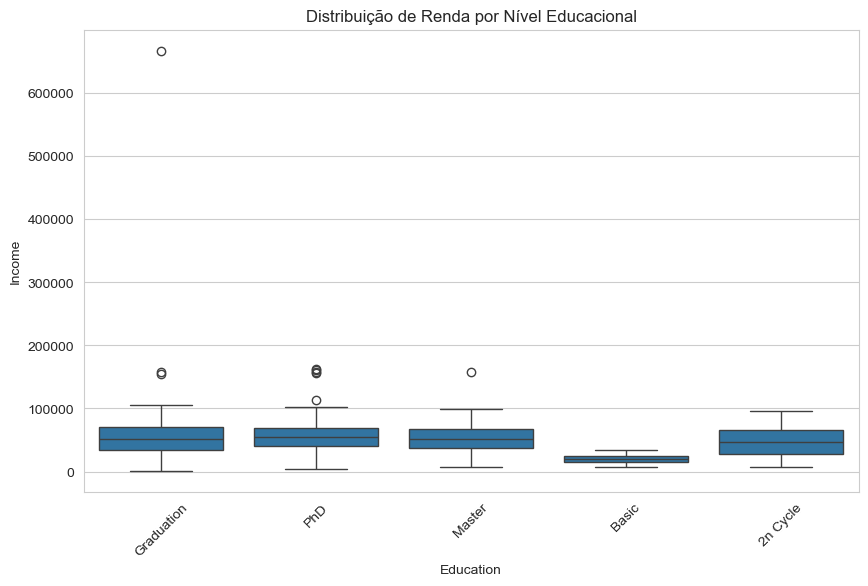

In [669]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição de Renda por Nível Educacional')
plt.show()

In [671]:
# Filtrar os dados da Education
df_edu = df[df['Education'].isin(['Master', '2n Cycle'])]

In [ ]:
# Comparar estatisicas e ver a semelhança 
df_edu.groupyby('Education')[['Age', 'Income', 

In [665]:
# Visualizando os valores unicos na coluna 'Marital_Status'
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [584]:
# Verifica quantas vezes os valores inconsistentes aparecem ANTES da substituição
valores_inconsistentes = ['Alone', 'Absurd', 'YOLO']
df['Marital_Status'].value_counts().loc[valores_inconsistentes]


Marital_Status
Alone     3
Absurd    2
YOLO      2
Name: count, dtype: int64

In [585]:
# Criando um dicionário de mapeamento específico para esses valores
marital_map = {
    'Single': 'Single',
    'Together': 'Together',
    'Married': 'Married',
    'Divorced:': 'Divorced',
    'Widow': 'Widow',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}


# Aplicando o mapeamento
df['Marital_Status'] = df['Marital_Status'].map(marital_map).fillna(df['Marital_Status'])
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

### Tratamento dos valores inconsistentes na coluna Marital_Status
Durante a análise inicial dos valores únicos da coluna Marital_Status, identificamos algumas categorias inconsistentes ou fora do padrão: 'Alone', 'Absurd' e 'YOLO'.

Essas categorias representam um número pequeno de registros (3 para 'Alone' e 2 para cada uma das outras duas) e não correspondem a status civis convencionais.

Para manter a consistência dos dados e facilitar o treinamento do modelo, optei por agrupar essas categorias como 'Single' (solteiro), que é a categoria mais próxima em significado para 'Alone', e uma boa aproximação para as outras duas.


In [587]:
# Criando a variavel 'Age'
recent_year = 1997
df['Age'] = recent_year - df['Year_Birth']

In [588]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'WebPurchases',
       'Age'],
      dtype='object')

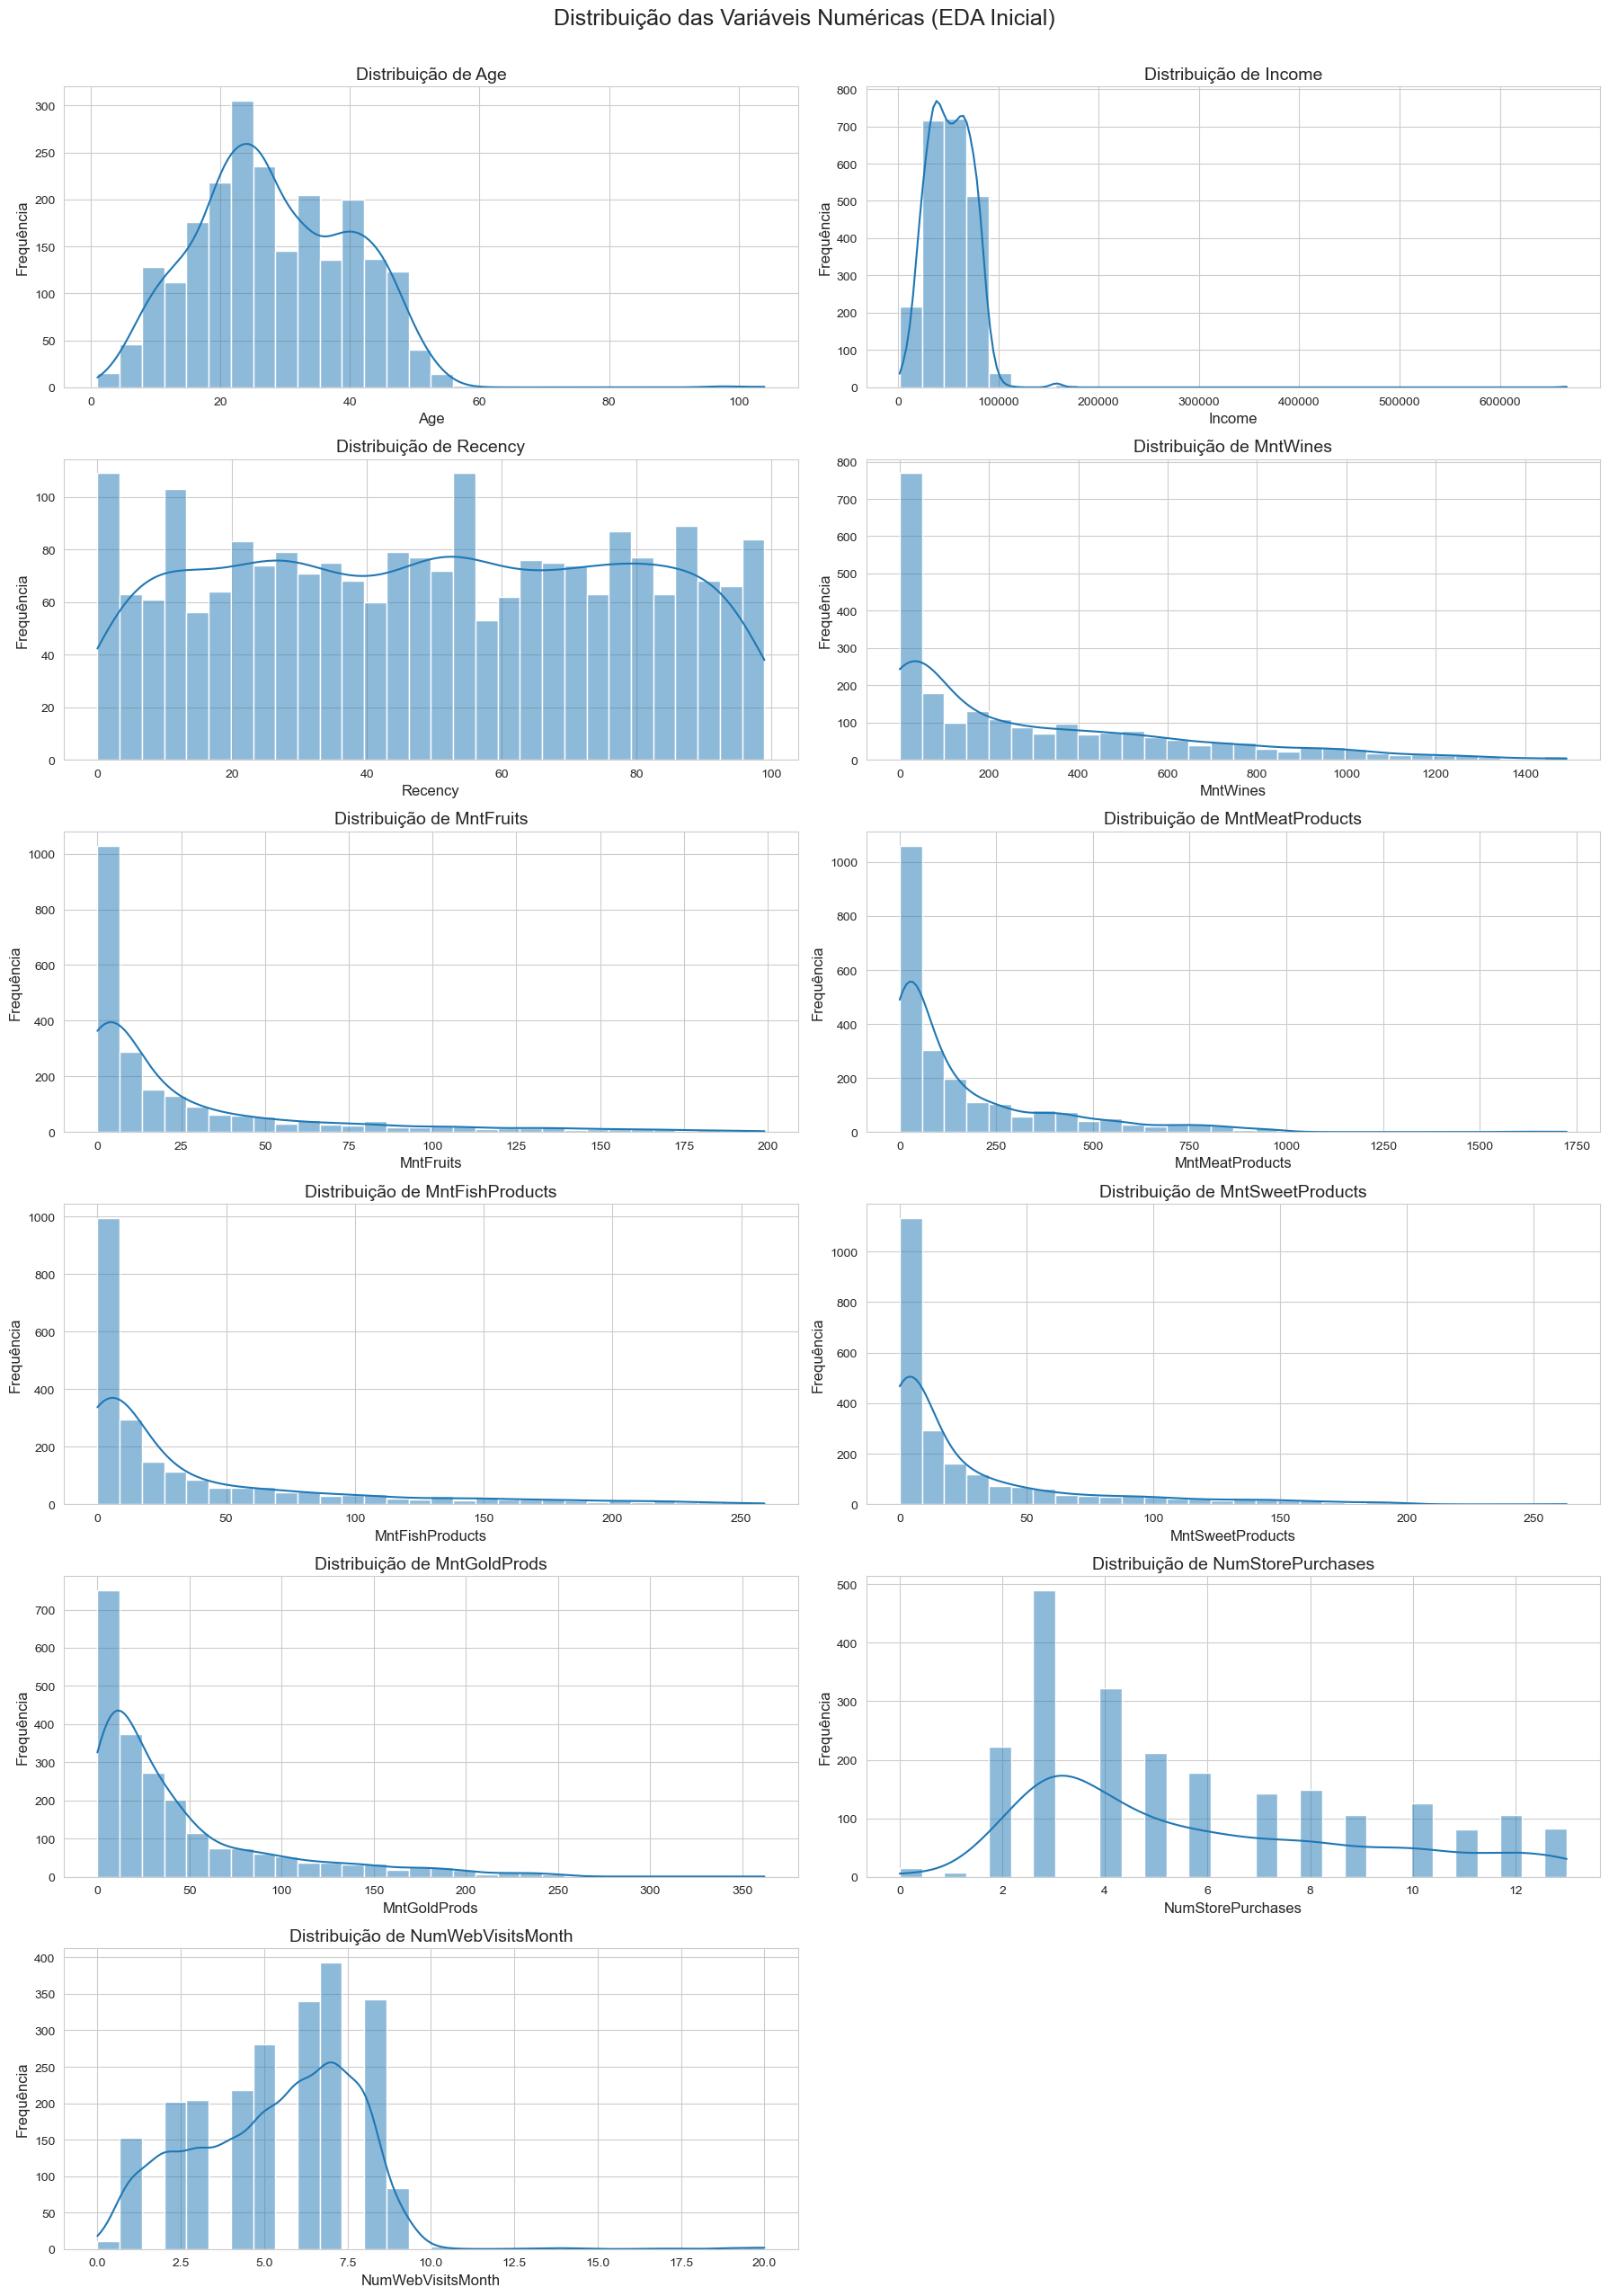

In [589]:
# Lista de colunas númericas que queremso visualizar
numeric_cols = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                'NumStorePurchases', 'NumWebVisitsMonth']

# Criando subplots para cada variável numérica 
plt.figure(figsize=(18, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência',fontsize=12)
    plt.tight_layout()
plt.suptitle('Distribuição das Variáveis Numéricas (EDA Inicial)', y=1.02, fontsize=18)
plt.show()

Insights Resumidos das Variáveis Numéricas (Gerais):
A análise completa dos histogramas revela que a maioria das variáveis de gasto com produtos (vinho, frutas, carne, peixe, doces, ouro) segue um padrão semelhante de assimetria à direita, onde a grande maioria dos clientes gasta pouco ou nada nessas categorias, enquanto um pequeno grupo de "grandes compradores" é responsável pela maior parte do gasto. Isso é um achado comum em dados de varejo e destaca a importância de identificar e segmentar esses clientes de alto valor.

As variáveis de frequência de compra (NumStorePurchases e NumWebVisitsMonth) mostram padrões mais variados, com NumStorePurchases indicando que a maioria dos clientes realiza poucas compras físicas, mas com alguns picos de frequência, e NumWebVisitsMonth sugerindo grupos distintos de frequência de visitas ao site (visitantes esporádicos vs. visitantes mais frequentes).

Em síntese: O comportamento de compra e navegação dos clientes é heterogêneo. Há um segmento de clientes com alto poder aquisitivo e gastos significativos em produtos específicos, contrastando com a maioria que gasta menos. A loja possui tanto clientes que compram presencialmente quanto aqueles que visitam o site, com diferentes frequências. Esta diversidade sugere a necessidade de segmentação e estratégias de marketing personalizadas para cada grupo de clientes.



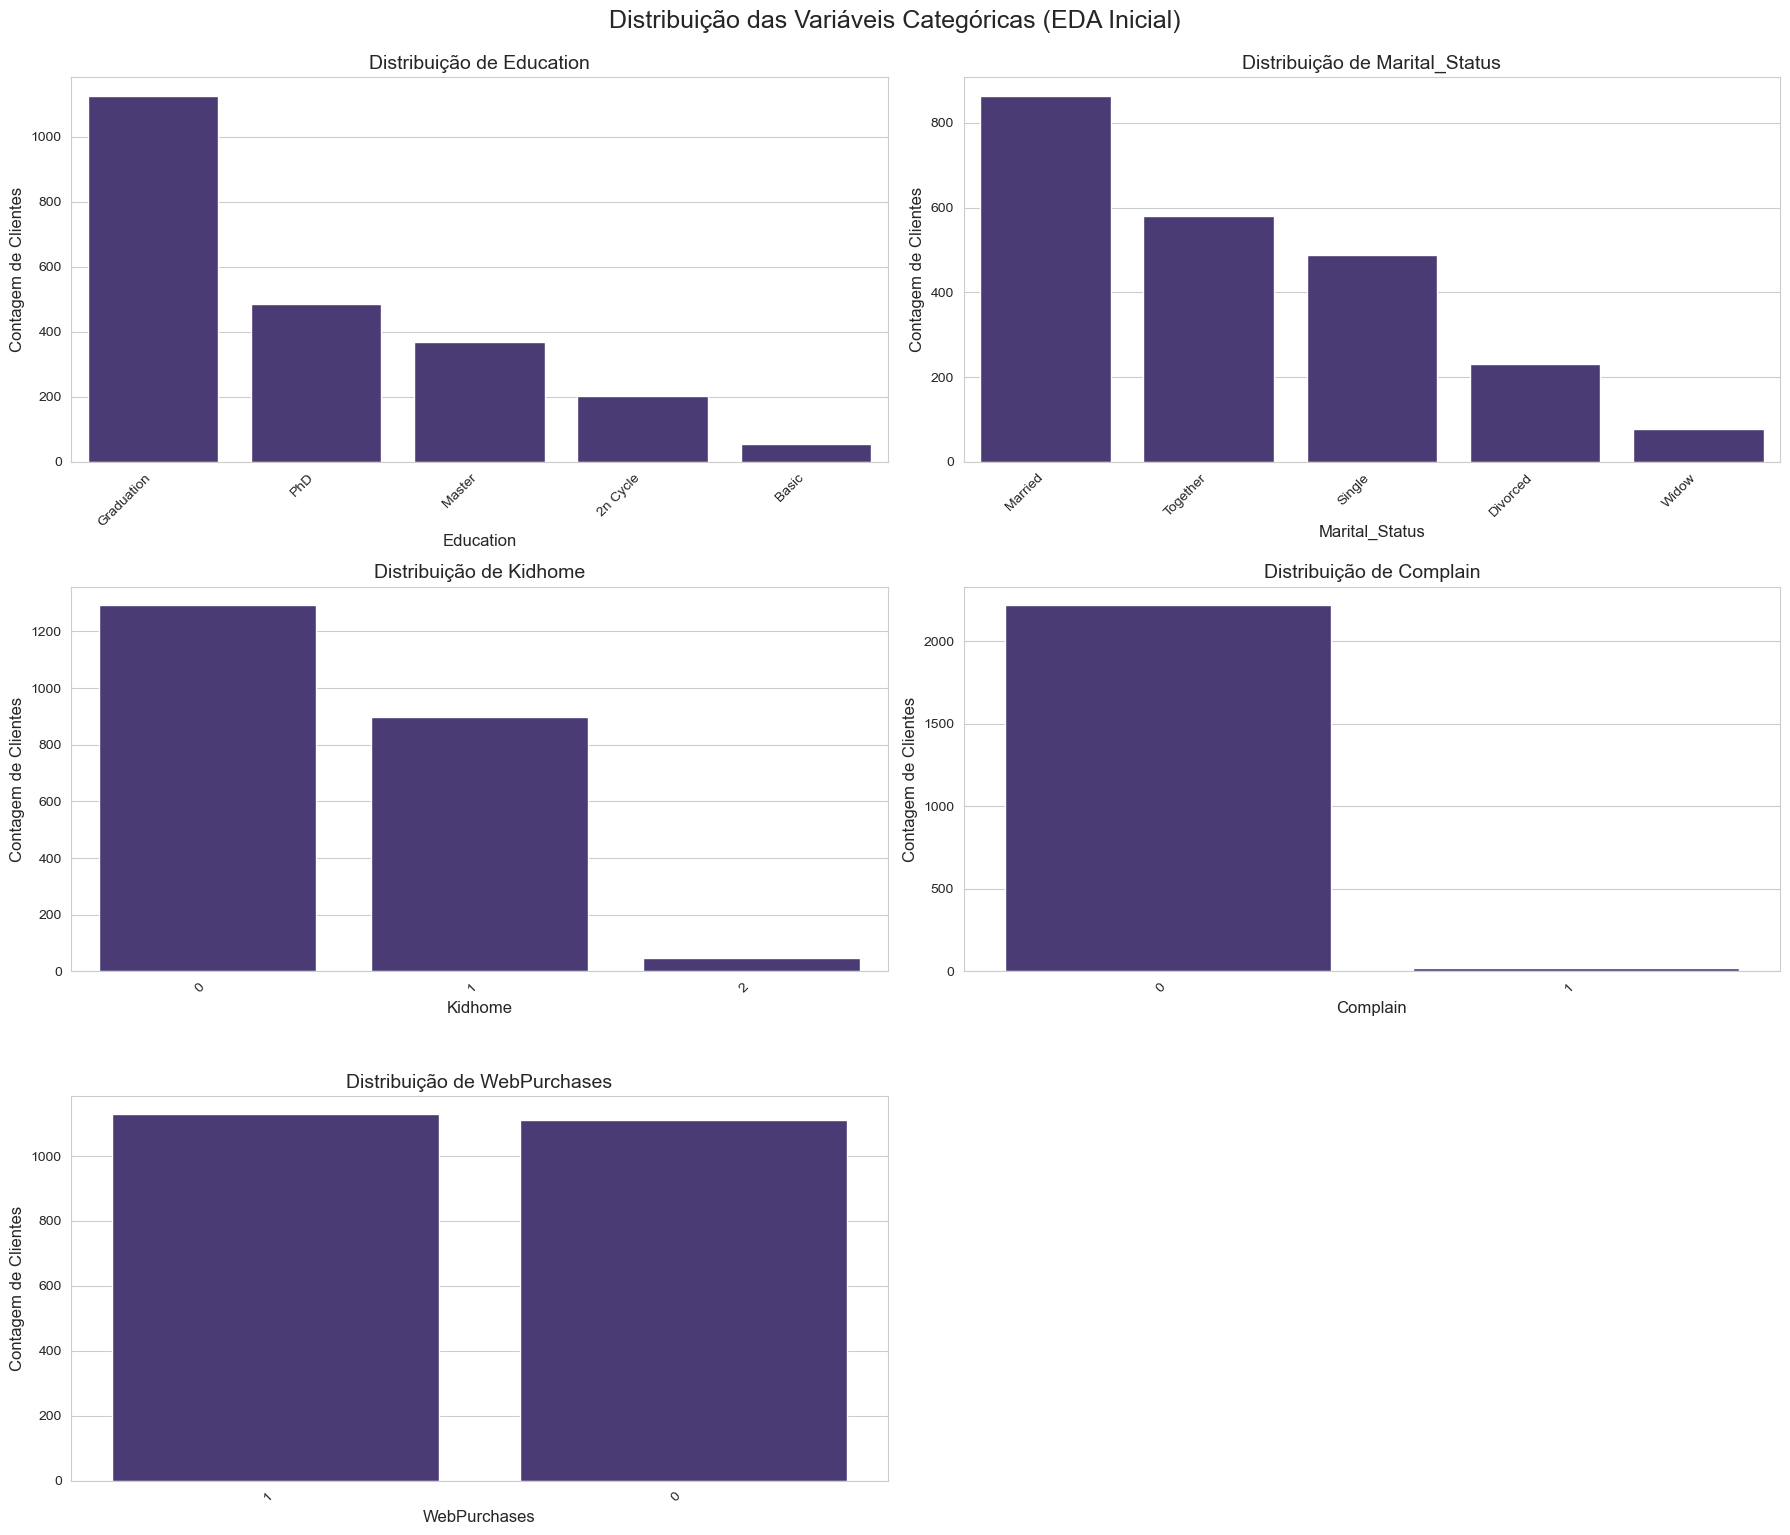

In [591]:
# Lista de colunas categóricas
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Complain', 'WebPurchases'] # Incluindo as binárias Kidhome, Complain e WebPurchases

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Ajuste o grid
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, color=sns.color_palette('viridis')[0])
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotaciona rótulos para melhor visualização
plt.tight_layout()
plt.suptitle('Distribuição das Variáveis Categóricas (EDA Inicial)', y=1.02, fontsize=18)
plt.show()

### Insights Resunidos das Variáveis 

A base de clienes é predoinantemente composta por individuos bem educados (Gradução, PhD, Master), muitos dos quais estão em relacionamentos estáveis (casados ou em união estável) e a maioria não posseum vrianças em casa, A satisfação geral parece ser alta, com pouquissima reclamaçõe. Crucialmente para o proleto, há um número sinificativo de cleinte que já fizeram compras onile, tornando a previsões da intenção e compras via web umobjetuvo viavel

### Análise
Aqui confirmamos que o dataset possui 2240 registros e que a maioria das colunas está completa. As únicas colunas categóricas são Education e Marital_Status, enquanto as demais são numéricas.

A coluna Year_Birth, embora esteja como inteiro, pode ser convertida em idade ou em uma data para gerar novos atributos úteis, como faixa etária, idade média por perfil, entre outros.

In [594]:
# Verificando valores nulos
df.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
Age                   0
dtype: int64

### Análise
Identificamos 24 valores nulos apenas na coluna Income (renda anual). Como eles representam uma quantidade muito pequena de registros em relação ao total do DataFrame, uma boa prática é substituir esses valores pela média da coluna, garantindo a integridade do conjunto de dados sem perda de informação.

In [596]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

df.isnull().sum()

Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
WebPurchases         0
Age                  0
dtype: int64

In [597]:
# Visualizar estátisticas básica das colunas númericas 
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571,28.194196
std,11.984069,25037.797168,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099,11.984069
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1959.000000,35538.750000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000,20.000000
50%,1970.000000,51741.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000,27.000000
75%,1977.000000,68289.750000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000,38.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000,104.000000


### Análise 

com a descrição estatisticas do nosso DataFrame podemos visualizar que 

### Usar o cóodigo do IQR 

In [600]:
# Verificando a contagem de outliers de idade 
df[df['Age'] < 18].shape[0]

424

In [601]:
df[df['Age'] > 90].shape[0]

3

In [602]:
# Definindo limites 
min_age_threshold = 18
max_age_threshold = 90

# Tratamento de idade < 18 (capping)
df['Age'] = np.where(df['Age'] < min_age_threshold, min_age_threshold, df['Age'])

In [603]:
# Tratar idade > 90 (Remoção)
df = df[df['Age'] <= max_age_threshold].copy()

In [604]:
# Verificando novamente as estatisticas descritiva da variável 'Age'
df['Age'].describe()

count    2237.000000
mean       29.282521
std        10.075552
min        18.000000
25%        20.000000
50%        27.000000
75%        38.000000
max        57.000000
Name: Age, dtype: float64

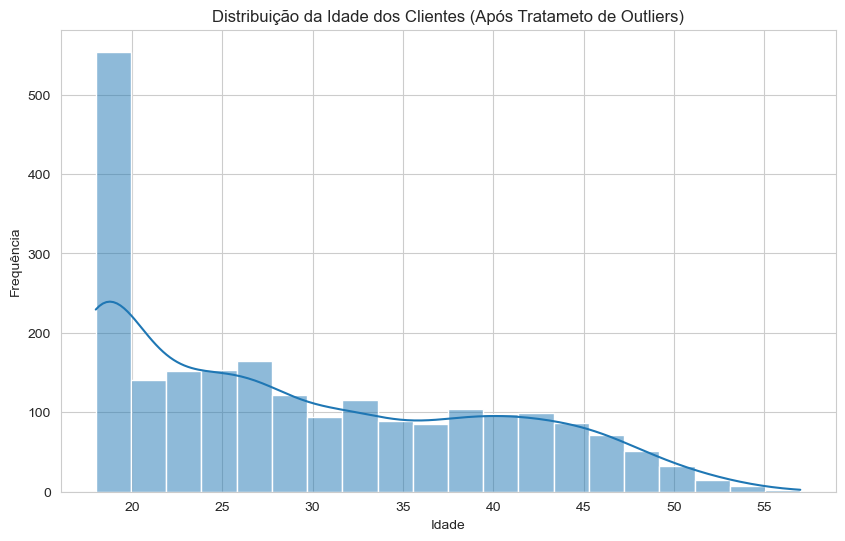

In [605]:
# Visualizando a distribuição da Idade após o tratamento 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Clientes (Após Tratameto de Outliers)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()      

In [606]:
# Fazendo o tratamento de outlies na variavel Income (capping)
income_99th_percentile = df['Income'].quantile(0.99)

# Contar quantos valores estão acima desse limite 
acima_99 = (df['Income'] > income_99th_percentile).sum()

print(f"Quantidade de valores acima do 99 percentil: {acima_99}")

Quantidade de valores acima do 99 percentil: 23


In [607]:
# Mostrarr os valores encontrados
print(f"99º percentil da Renda: {income_99th_percentile:.2f}")

df['Income'] = df['Income'].clip(upper=income_99th_percentile)
df['Income'].describe()

99º percentil da Renda: 94440.32


count     2237.000000
mean     51749.776662
std      20648.379259
min       1730.000000
25%      35523.000000
50%      51717.000000
75%      68281.000000
max      94440.320000
Name: Income, dtype: float64

In [608]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'WebPurchases',
       'Age'],
      dtype='object')

In [609]:
# Criando uma nova variavel de total gasto
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Visualizar a estatístisca descritivas da nova variável 'Total_Spend'
df['Total_Spent'].describe()

count    2237.000000
mean      632.812249
std       627.594005
min         5.000000
25%        73.000000
50%       404.000000
75%      1096.000000
max      2672.000000
Name: Total_Spent, dtype: float64

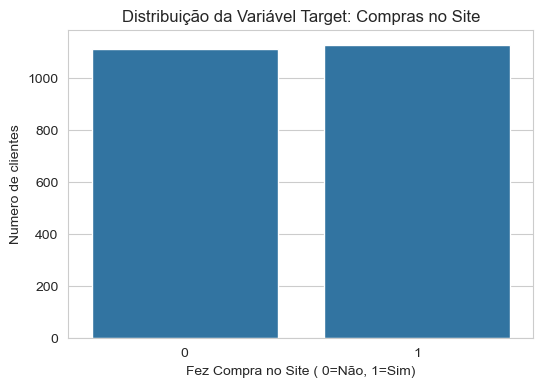

In [610]:
# Visualizando a distribuição da variável target 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='WebPurchases')
plt.title('Distribuição da Variável Target: Compras no Site')
plt.xlabel('Fez Compra no Site ( 0=Não, 1=Sim)')
plt.ylabel('Numero de clientes')
plt.show()

In [611]:
print(f"99º percentil da Renda: {income_99th_percentile:.2f}")
'''# Visualizando a distribuição das colunas númericas 
numeric_cols = df.select_dtypes(include=['number']).columns

# Definindo o número de fráficos por linha para organizar a visualização
n_cols = 3 # 3 Gráficos por linha
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula o número de linhas necessário

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ajusta o tamanho da figura

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequeência')
    plt.tight_layout()
plt.show()'''

99º percentil da Renda: 94440.32


"# Visualizando a distribuição das colunas númericas \nnumeric_cols = df.select_dtypes(include=['number']).columns\n\n# Definindo o número de fráficos por linha para organizar a visualização\nn_cols = 3 # 3 Gráficos por linha\nn_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula o número de linhas necessário\n\nplt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ajusta o tamanho da figura\n\nfor i, col in enumerate(numeric_cols):\n    plt.subplot(n_rows, n_cols, i + 1)\n    sns.histplot(df[col], kde=True, bins=15)\n    plt.title(f'Distribuição de {col}')\n    plt.xlabel(col)\n    plt.ylabel('Frequeência')\n    plt.tight_layout()\nplt.show()"

In [613]:
'''# Selecionando apenas as colunas categóricas 
categorical_cols = df.select_dtypes(include=['object']).columns

# Itera sobre cada coluna categórica e craiar um gráfico de barras separdo
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index, hue=col, legend=False)
    plt.title(f'Contagem de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()'''

"# Selecionando apenas as colunas categóricas \ncategorical_cols = df.select_dtypes(include=['object']).columns\n\n# Itera sobre cada coluna categórica e craiar um gráfico de barras separdo\nfor col in categorical_cols:\n    plt.figure(figsize=(8, 6))\n    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index, hue=col, legend=False)\n    plt.title(f'Contagem de {col}')\n    plt.xlabel(col)\n    plt.ylabel('Contagem')\n    plt.xticks(rotation=45, ha='right')\n    plt.tight_layout()\n    plt.show()"

In [614]:
'''# Analisando apenas as colunas numericas 
numeric_df = df[numeric_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()'''

"# Analisando apenas as colunas numericas \nnumeric_df = df[numeric_cols]\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(numeric_df.corr(),\n            annot=True,\n            cmap='coolwarm',\n            fmt='.2f',\n            linewidths=.5)\nplt.title('Matriz de Correlação', fontsize=16)\nplt.show()"

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [617]:
# seu código aqui

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [619]:
# seu código aqui

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [621]:
# seu código aqui

In [622]:
# Carregndo a base de dados 
df = pd.read_csv('marketing_campaign.csv', delimiter=';')